In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset using your specific filename
df = pd.read_csv('amazon_products_sales_data_uncleaned.csv')

# Show the first 5 rows to make sure it loaded correctly
df.head()

,title,rating,number_of_reviews,bought_in_last_month,current/discounted_price,price_on_variant,listed_price,is_best_seller,is_sponsored,is_couponed,buy_box_availability,delivery_details,sustainability_badges,image_url,product_url,collected_at
0,BOYA BOYALINK 2 Wireless Lavalier Microphone f...,4.6 out of 5 stars,375,300+ bought in past month,89.68,basic variant price: 2.4GHz,$159.00,No Badge,Sponsored,Save 15% with coupon,Add to cart,"Delivery Mon, Sep 1",Carbon impact,https://m.media-amazon.com/images/I/71pAqiVEs3...,/sspa/click?ie=UTF8&spc=MTo4NzEzNDY2NTQ5NDYxND...,2025-08-21 11:14:29
1,"LISEN USB C to Lightning Cable, 240W 4 in 1 Ch...",4.3 out of 5 stars,"2,457",6K+ bought in past month,9.99,basic variant price: nan,$15.99,No Badge,Sponsored,No Coupon,Add to cart,"Delivery Fri, Aug 29",NaN,https://m.media-amazon.com/images/I/61nbF6aVIP...,/sspa/click?ie=UTF8&spc=MTo4NzEzNDY2NTQ5NDYxND...,2025-08-21 11:14:29
2,"DJI Mic 2 (2 TX + 1 RX + Charging Case), Wirel...",4.6 out of 5 stars,"3,044",2K+ bought in past month,314.00,basic variant price: nan,$349.00,No Badge,Sponsored,No Coupon,Add to cart,"Delivery Mon, Sep 1",NaN,https://m.media-amazon.com/images/I/61h78MEXoj...,/sspa/click?ie=UTF8&spc=MTo4NzEzNDY2NTQ5NDYxND...,2025-08-21 11:14:29
3,"Apple AirPods Pro 2 Wireless Earbuds, Active N...",4.6 out of 5 stars,"35,882",10K+ bought in past month,NaN,basic variant price: $162.24,No Discount,Best Seller,Organic,No Coupon,NaN,NaN,NaN,https://m.media-amazon.com/images/I/61SUj2aKoE...,/Apple-Cancellation-Transparency-Personalized-...,2025-08-21 11:14:29
4,Apple AirTag 4 Pack. Keep Track of and find Yo...,4.8 out of 5 stars,"28,988",10K+ bought in past month,NaN,basic variant price: $72.74,No Discount,No Badge,Organic,No Coupon,NaN,NaN,NaN,https://m.media-amazon.com/images/I/61bMNCeAUA...,/Apple-MX542LL-A-AirTag-Pack/dp/B0D54JZTHY/ref...,2025-08-21 11:14:29


In [3]:
# Check the summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15217 entries, 0 to 15216
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   title                     15217 non-null  object
 1   rating                    15167 non-null  object
 2   number_of_reviews         15167 non-null  object
 3   bought_in_last_month      13885 non-null  object
 4   current/discounted_price  11066 non-null  object
 5   price_on_variant          15217 non-null  object
 6   listed_price              15217 non-null  object
 7   is_best_seller            15217 non-null  object
 8   is_sponsored              15217 non-null  object
 9   is_couponed               15217 non-null  object
 10  buy_box_availability      10117 non-null  object
 11  delivery_details          11128 non-null  object
 12  sustainability_badges     1203 non-null   object
 13  image_url                 15216 non-null  object
 14  product_url           

In [4]:
# Print the list of column names
print(df.columns)

Index(['title', 'rating', 'number_of_reviews', 'bought_in_last_month',
       'current/discounted_price', 'price_on_variant', 'listed_price',
       'is_best_seller', 'is_sponsored', 'is_couponed', 'buy_box_availability',
       'delivery_details', 'sustainability_badges', 'image_url', 'product_url',
       'collected_at'],
      dtype='object')


In [5]:
# Check the first 5 rows of the price column specifically
df ['current/discounted_price'].head()

,current/discounted_price
0,89.68
1,9.99
2,314.00
3,NaN
4,NaN


In [6]:
# 1. Clean the 'Price' column
# This forces everything to be a number. If it can't, it becomes NaN (empty)
df['current/discounted_price'] = pd.to_numeric(df['current/discounted_price'], errors='coerce')

# 2. Clean the 'Rating' column
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# 3. Clean the 'Number of Reviews' column
df['number_of_reviews'] = pd.to_numeric(df['number_of_reviews'], errors='coerce')

# 4. Drop the rows where data is missing or broken
df = df.dropna(subset=['current/discounted_price', 'rating', 'number_of_reviews'])

# Check the data types one last time (They should now say float64 or int64)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   title                     0 non-null      object 
 1   rating                    0 non-null      float64
 2   number_of_reviews         0 non-null      float64
 3   bought_in_last_month      0 non-null      object 
 4   current/discounted_price  0 non-null      float64
 5   price_on_variant          0 non-null      object 
 6   listed_price              0 non-null      object 
 7   is_best_seller            0 non-null      object 
 8   is_sponsored              0 non-null      object 
 9   is_couponed               0 non-null      object 
 10  buy_box_availability      0 non-null      object 
 11  delivery_details          0 non-null      object 
 12  sustainability_badges     0 non-null      object 
 13  image_url                 0 non-null      object 
 14  product_url               0

In [8]:
# 1. Reload the data fresh
df = pd.read_csv('amazon_products_sales_data_uncleaned.csv')

# 2. The "Nuclear" Clean for Price
# This converts the column to string, then removes ANYTHING that is not a digit (0-9) or a dot (.)
df['current/discounted_price'] = df['current/discounted_price'].astype(str).str.replace(r'[^\d.]', '', regex=True)

# 3. Convert to numbers (now it should be easy for Python)
df['current/discounted_price'] = pd.to_numeric(df['current/discounted_price'], errors='coerce')

# 4. Do the same for Rating (just in case)
df['rating'] = df['rating'].astype(str).str.replace(r'[^\d.]', '', regex=True)
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# 5. Drop rows ONLY if Price or Rating is missing
df = df.dropna(subset=['current/discounted_price', 'rating'])

# 6. Check the result
print(f"Success! We now have {len(df)} rows of clean data.")
print("Here are the first 5 clean prices:")
print(df['current/discounted_price'].head())

Success! We now have 30337 rows of clean data.
Here are the first 5 clean prices:
0      89.68
1       9.99
2     314.00
8      16.99
10     14.99
Name: current/discounted_price, dtype: float64


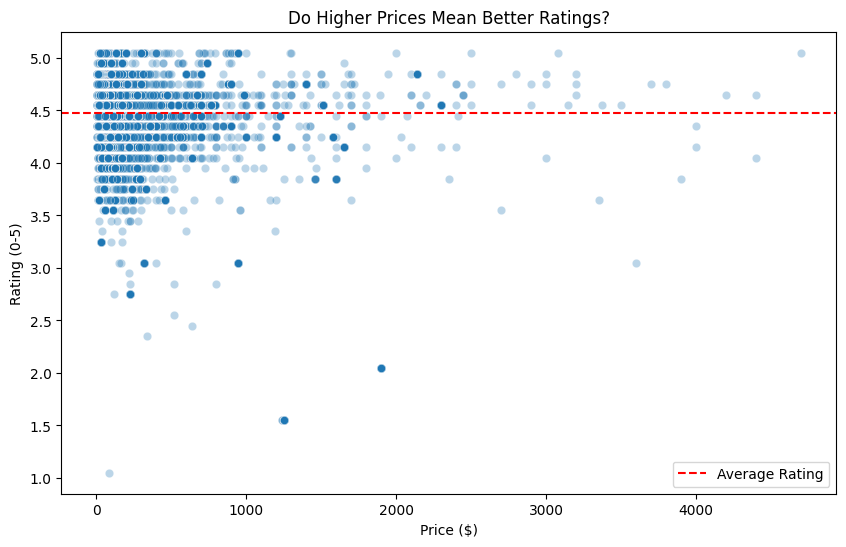

In [9]:
# Set the size of the graph
plt.figure(figsize=(10, 6))

# Create the scatter plot
# We use alpha=0.3 this time because you have SO MUCH data (dots will overlap a lot)
sns.scatterplot(x='current/discounted_price', y='rating', data=df, alpha=0.3)

# Add a red line to show the average rating
plt.axhline(y=df['rating'].mean(), color='red', linestyle='--', label='Average Rating')

plt.title('Do Higher Prices Mean Better Ratings?')
plt.xlabel('Price ($)')
plt.ylabel('Rating (0-5)')
plt.legend()
plt.show()

/tmp/ipython-input-315907410.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_best_seller', y='rating', data=df, palette='Set2')


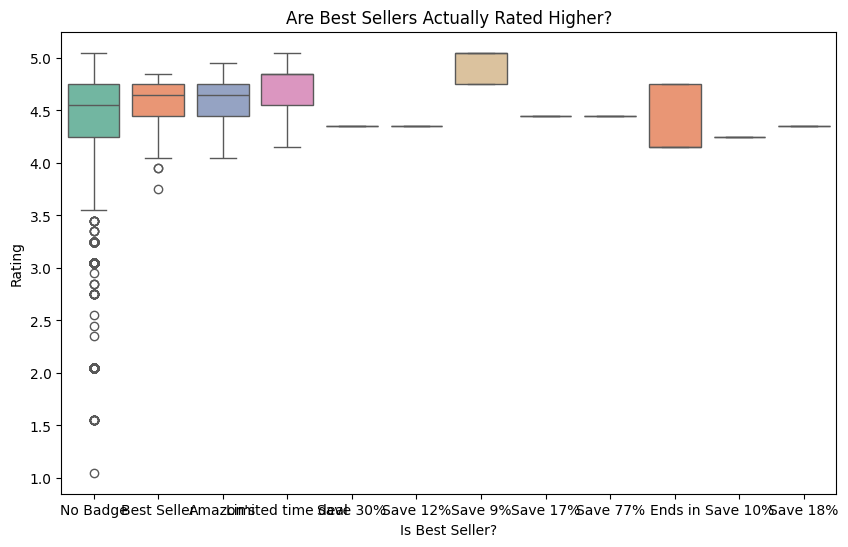

In [10]:
plt.figure(figsize=(10, 6))

# Boxplot: Best Seller vs Rating
# x = Categories (True/False), y = The numbers we want to compare (Rating)
sns.boxplot(x='is_best_seller', y='rating', data=df, palette='Set2')

plt.title('Are Best Sellers Actually Rated Higher?')
plt.xlabel('Is Best Seller?')
plt.ylabel('Rating')
plt.show()

/tmp/ipython-input-130766318.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='badge_category', y='rating', data=df, palette='Set2')


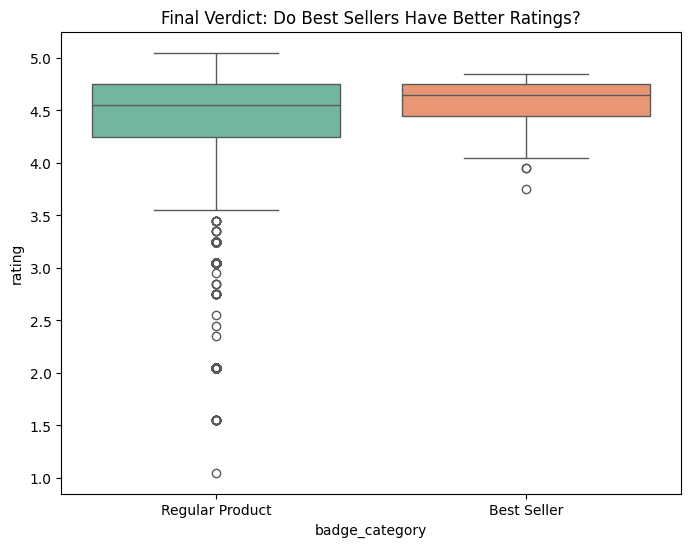

In [11]:
# 1. Create a function to simplify the categories
def simplify_badge(x):
    if x == 'Best Seller':
        return 'Best Seller'
    else:
        return 'Regular Product'

# 2. Apply this to create a new clean column
df['badge_category'] = df['is_best_seller'].apply(simplify_badge)

# 3. Plot the final clean comparison
plt.figure(figsize=(8, 6))
sns.boxplot(x='badge_category', y='rating', data=df, palette='Set2')
plt.title('Final Verdict: Do Best Sellers Have Better Ratings?')
plt.show()

# 📝 Project Conclusion

### **1. Price vs. Quality**
* **Observation:** The Scatter Plot shows a wide distribution of ratings across all price points.
* **Insight:** Higher prices **do not** guarantee higher ratings. There are many low-priced items with 5-star ratings and expensive items with mixed reviews.

### **2. The "Best Seller" Effect**
* **Observation:** Products with the "Best Seller" badge have a slightly higher median rating than those without it.
* **Insight:** While "Best Seller" status correlates with better customer satisfaction, the difference is not drastic. It suggests that while popular items are generally good, "hidden gems" (good products without badges) definitely exist.

### **3. Strategic Recommendation**
For a new seller entering this market:
* **Pricing:** Competitive pricing is critical, as high prices do not automatically signal quality to customers.
* **Social Proof:** Striving for a "Best Seller" badge is valuable, but maintaining a high quality-to-price ratio is the most effective way to secure high ratings.